# 1: Anime data set

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
import numpy as np
from numpy.polynomial import Polynomial
from typing import Final
import scipy.interpolate
import re

plt.style.use('dark_background')

df = pd.read_csv('user_data.csv')

now = df.last_online.map(lambda a: datetime.strptime(a[:10], '%Y-%m-%d'), na_action = 'ignore').max()

def getYears(a):
    return a.years + a.months / 12 + a.days / 365.25

df['age'] = df.birthday.map((lambda a: getYears(relativedelta(now, datetime.strptime(a[:10], '%Y-%m-%d')))), na_action = 'ignore')  

None

## Проблемы в данных
* нереалистичные люди с тысячами аниме
* в интернете (почти) всем есть 18 лет
* шуточные локацие (wired, forhead)
* пользователи с указанным возрастом менее 4 лет являются подозрительными

In [72]:
del df['location']
df = df[df.total_entries < 2000]
df = df[(df.age > 3) & (df.age < 80)]
df.to_csv('modified.csv')
df.head(6)

,name,planning,watched,completed,days_watched,dropped,episodes_watched,mean_score,on_hold,plan_to_watch,rewatched,total_entries,watching,birthday,gender,joined,last_online,favorites,genre_count,age
2,-Hentai,"[{'mal_id': 39783, 'title': '5-toubun no Hanay...","[{'title': '3-gatsu no Lion', 'mal_id': 31646,...",887,270.4,60,16189,7.36,9,88,8,1070,26,1991-11-05T00:00:00+00:00,Male,2014-05-19T00:00:00+00:00,2020-09-21 19:11:28+00:00,"{'anime': [{'mal_id': 31933, 'title': 'JoJo no...","{'Action': 418, 'Adventure': 210, 'Cars': 1, '...",28.890828
5,-Kurosawa-,"[{'mal_id': 38749, 'title': 'Blade Runner: Bla...","[{'title': '""0""', 'mal_id': 20707, 'score': 0,...",594,201.2,12,12248,5.42,5,13,34,651,27,2000-05-05T00:00:00+00:00,Male,2016-12-11T00:00:00+00:00,2020-09-20 12:52:00+00:00,"{'anime': [], 'characters': [], 'people': []}","{'Action': 301, 'Adventure': 152, 'Cars': 3, '...",20.390828
6,-Lethargica-,"[{'mal_id': 6408, 'title': '""Bungaku Shoujo"" M...","[{'title': '00:08', 'mal_id': 28761, 'score': ...",433,51.8,0,3252,5.36,3,666,0,1113,11,1995-03-21T00:00:00+00:00,Female,2017-05-30T00:00:00+00:00,2020-09-25 13:39:32+00:00,"{'anime': [{'mal_id': 339, 'title': 'Serial Ex...","{'Action': 81, 'Adventure': 64, 'Cars': 0, 'Co...",25.513689
7,-Mahiru-,"[{'mal_id': 19429, 'title': 'Akuma no Riddle'}...",[{'title': '30-pun de Wakaru! Kore made no Lov...,227,44.7,9,2799,7.96,3,81,11,325,5,2003-02-04T00:00:00+00:00,Female,2017-06-15T00:00:00+00:00,2020-09-25 20:23:22+00:00,"{'anime': [{'mal_id': 9253, 'title': 'Steins;G...","{'Action': 56, 'Adventure': 20, 'Cars': 0, 'Co...",17.643566
9,-Ryu,"[{'mal_id': 40148, 'title': '22/7'}, {'mal_id'...","[{'title': '.hack//Sign', 'mal_id': 48, 'score...",700,226.3,86,13319,5.48,7,157,60,954,4,1993-11-18T00:00:00+00:00,Male,2016-08-22T00:00:00+00:00,2020-09-26 04:07:30+00:00,"{'anime': [{'mal_id': 5114, 'title': 'Fullmeta...","{'Action': 296, 'Adventure': 179, 'Cars': 0, '...",26.855236
10,-Space_Cowboy-,[],"[{'title': '5-toubun no Hanayome', 'mal_id': 3...",531,184.5,0,10880,6.79,0,0,0,534,3,1996-06-05T00:00:00+00:00,Male,2016-03-10T00:00:00+00:00,2020-09-22 19:46:33+00:00,"{'anime': [{'mal_id': 918, 'title': 'Gintama'}...","{'Action': 292, 'Adventure': 141, 'Cars': 2, '...",24.307495


## Гистограмма

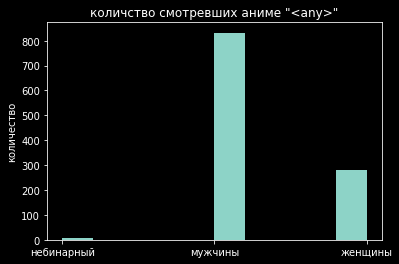

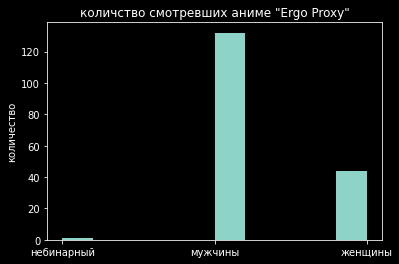

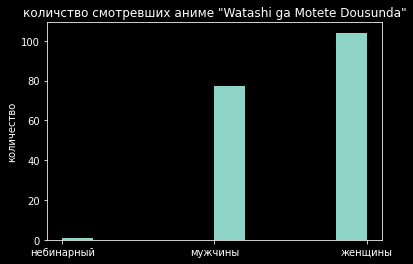

In [73]:
def mapper(x):
    # if pd.isna(x):
    #    return 0
    if x == 'Non-Binary':
        return 1
    if x == 'Male':
        return 2
    if x == 'Female':
        return 3
    raise

def plotAnime(a, filt = None):
    if filt is None:
        filt = lambda b: b[b.watched.str.contains(a)]
    plt.hist(filt(df).gender.map(mapper, na_action = 'ignore'))
    plt.title("количство смотревших аниме \"%s\"" % a)
    plt.ylabel('количeство')
    plt.xticks([1, 2, 3], ["небинарный", "мужчины", "женщины"])
    plt.show()

plotAnime("<any>", lambda x: x)
plotAnime("Ergo Proxy")
plotAnime("Watashi ga Motete Dousunda")
del mapper
del plotAnime


Как можно заметить, среди смотревших (данное) отомэ аниме больше девушек, в то время как отношение полов зарегестрированных пользователей **визуально** похоже на посмотревших "Ergo Proxy".

## График

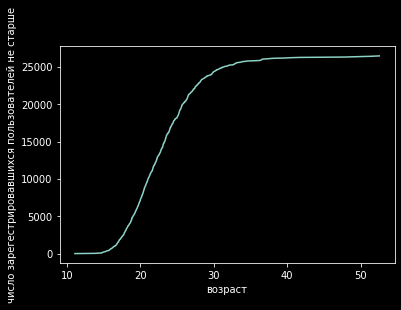

In [74]:
def noPolution():
    ages = df.age.dropna().sort_values()
    cdf = ages.cumsum()
    plt.plot(ages, cdf)
    plt.ylabel('число зарегестрировавшихся пользователей не старше')
    plt.xlabel('возраст')
    plt.show()

noPolution()


Можно заметить, что наибольшее количество людей зарегестрированныз на сайте имеют возраст в промежутке от 16 до 40 лет. В работоспособном возрасте аниме смотрят....

## Двумерная диаграмма

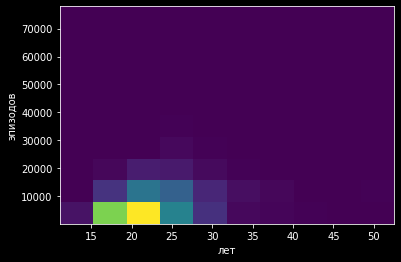

In [75]:
withage = df[df.age.notna()]
plt.hist2d(withage.age, withage.episodes_watched)
plt.ylabel('эпизодов')
plt.xlabel('лет')
plt.show()

## Точечная

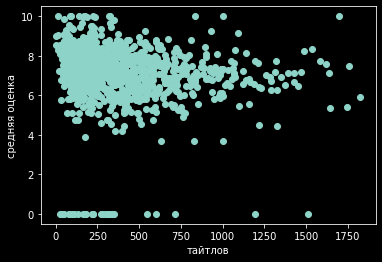

In [76]:
plt.scatter(df.completed, df.mean_score)
plt.ylabel('средняя оценка')
plt.xlabel('тайтлов')
plt.show()

Визуально кажется, что у людей с малым количеством просмотренных аниме болший разброс оценки

## Новая характеристика
Просмотрено аниме в год жизни

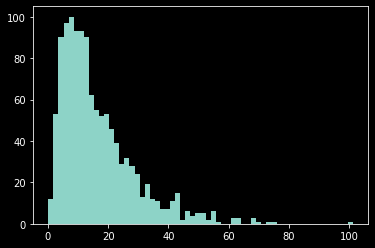

In [77]:
df['anime_per_year'] = df.completed / df.age
plt.hist(df.anime_per_year, bins = 60)
plt.show()

## Ящик с усами

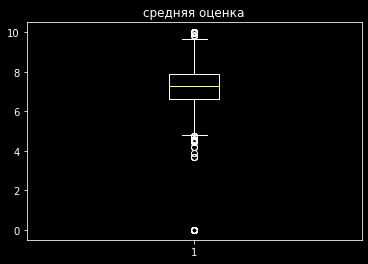

In [78]:
plt.boxplot(df.mean_score)
plt.title("средняя оценка")
plt.show()

## 3d

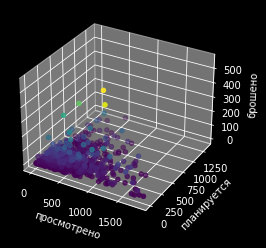

In [79]:
# from mpl_toolkit import mplot3d

ax = plt.axes(projection='3d')
ax.scatter(df.completed, df.plan_to_watch + df.watching, df.dropped, c = df.dropped)
ax.set_xlabel('просмотрено')
ax.set_ylabel('планируется')
ax.set_zlabel('брошено')

plt.show()

# 2: Интерполяция

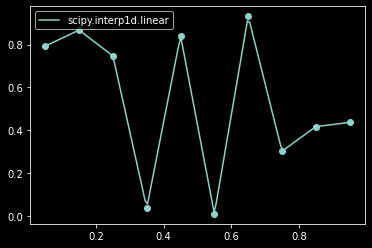

In [80]:
def makeArrange(min, max, step):
    return np.arange(min + step / 2, max + step / 2 - step / 10, step)
def makeArrangeCount(min, max, bins):
    return makeArrange(min, max, (max - min) / bins)

def noPolution():
    n : Final = 10
    xs = makeArrangeCount(0, 1, n)
    ys = np.random.random(n)
    step = (xs[-1] - xs[0]) / 128
    xf = np.arange(xs[0], xs[-1] - step / 20, step)

    cs = scipy.interpolate.interp1d(xs, ys)
    plt.plot(xf, cs(xf), label='scipy.interp1d.linear')
    plt.legend()

    plt.scatter(xs, ys)
    plt.show()

noPolution()

[исходный код](https://github.com/scipy/scipy/blob/47bb6febaa10658c72962b9615d5d5aa2513fa3a/scipy/interpolate/interpolate.py#L608)

## Собственная интерполяция: полином Лагранжа

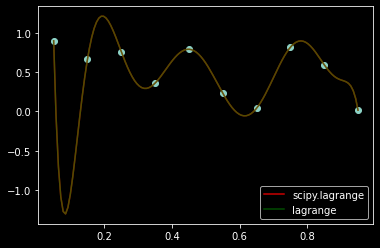

In [81]:
def excludingRange(b, e, ex):
    for i in range(b, e):
        if i != ex:
            yield i
def lagrange(x, y):
    def makeli(i):
        xj = np.delete(x, i)
        xi_replicated = np.repeat(x[i],  len(x) - 1)
        t = np.prod([Polynomial([-ixj, 1]) for ixj in xj])
        b = np.prod(xi_replicated - xj)
        return t / b
    res = np.sum([makeli(i) * y[i] for i in range(len(x))])
    return res

def noPolution():
    n : Final = 10
    # xs = np.random.random(n)
    # xs = np.unique(xs)
    xs = makeArrangeCount(0, 1, n)
    ys = np.random.random(n)
    step = (xs[-1] - xs[0]) / 128
    xf = np.arange(xs[0], xs[-1] + step / 2, step)

    cs = scipy.interpolate.lagrange(xs, ys)
    plt.plot(xf, cs(xf), label='scipy.lagrange', alpha = 0.8, color = 'red')
    plt.legend()
    mylag = lagrange(xs, ys)
    plt.plot(xf, mylag(xf), label='lagrange', alpha = 0.6, color = 'green')
    plt.legend()

    plt.scatter(xs, ys)
    plt.show()
noPolution()

Видно, что графики наложились

# 3: гистограмма

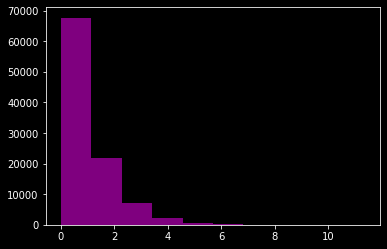

In [88]:
def myHist(arr, bins = 10, **args):
    max : Final = arr.min()
    min : Final = arr.max()
    step : Final = (max - min) / bins
    plt.bar(makeArrange(min, max, step), np.flip(np.histogram(arr, bins)[0]), width = step, **args)

def myHist2(arr, bins = 10, **args):
    max : Final = arr.min()
    min : Final = arr.max()
    step : Final = (max - min) / bins
    counts = np.zeros(bins)
    binsminus1 = bins - 1
    for i in arr:
        ind = int((i - min) / step)
        counts[np.minimum(ind, binsminus1)] += 1
    plt.bar(makeArrange(min, max, step), counts, width = step, **args)
    
def generateHistogramTestPoints():
    return np.random.exponential(size = 100000)
def noPolution():  
    xs = generateHistogramTestPoints()
    plt.hist(xs, color = 'red', alpha = 1)
    myHist2(xs, color = 'blue', alpha = 0.5)
    plt.show()

noPolution()

In [89]:
def prepareTest():
    global testData
    plt.clf()
    testData = generateHistogramTestPoints()

In [90]:
%%capture --no-stderr capturedBuiltin
%%timeit -n1 -r10 prepareTest()
plt.hist(testData)

In [91]:
%%capture --no-stderr capturedNp
%%timeit -n1 -r10 prepareTest()
myHist(testData)

In [92]:
%%capture --no-stderr capturedOwn
%%timeit -n1 -r10 prepareTest()
myHist2(testData)

In [93]:
def pretty(s):
    return re.sub('per loop.*', 'per loop', s).strip()
pd.DataFrame(data = {
    'встроенная': [pretty(capturedBuiltin.stdout)],
    'numpy': [pretty(capturedNp.stdout)],
    'собственная': [pretty(capturedOwn.stdout)]})

,встроенная,numpy,собственная
0,51 ms +- 7.55 ms per loop,50.7 ms +- 17 ms per loop,365 ms +- 27.7 ms per loop


Оказалось, что если чистить график вне бенчмарки, то все замеры примерно одинаковые, что было очень ожидаемо.